# HW 3:

## Part 1:  
*Begin by plotting a Gaussian and Lorentzian profile.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz

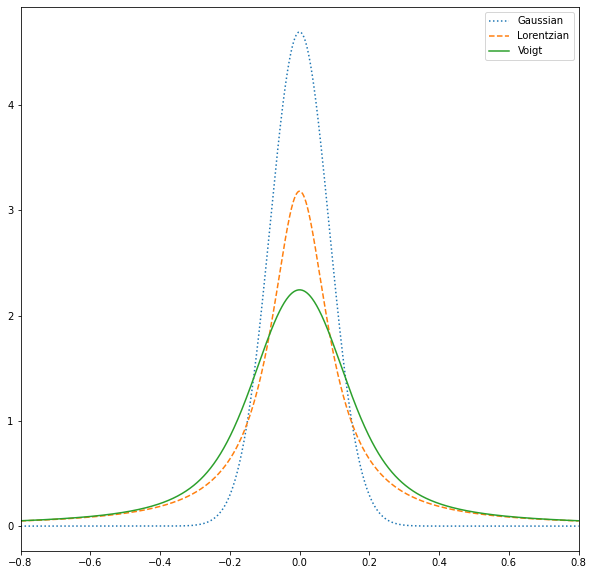

In [2]:
def G(x, alpha):
    """ Return Gaussian line shape at x with HWHM alpha """
    return np.sqrt(np.log(2) / np.pi) / alpha\
                             * np.exp(-(x / alpha)**2 * np.log(2))

def L(x, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return gamma / np.pi / (x**2 + gamma**2)

def V(x, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi)
fig, ax = plt.subplots(1,1, figsize = (10, 10))

alpha, gamma = 0.1, 0.1
x = np.linspace(-0.8,0.8,1000)
ax.plot(x, G(x, alpha), ls=':', label='Gaussian')
ax.plot(x, L(x, gamma), ls='--', label='Lorentzian')
ax.plot(x, V(x, alpha, gamma), label='Voigt')
ax.set_xlim(-0.8,0.8)
ax.legend()

### Question 1:   

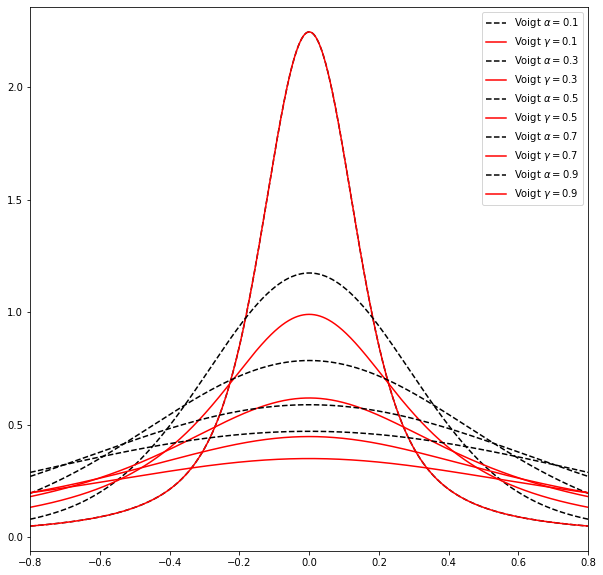

In [3]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))

alpha, gamma = np.arange(0.1, 1, 0.2), 0.1
x = np.linspace(-0.8,0.8,1000)

for a in alpha: 
    ax.plot(x, V(x, a, gamma), label=f'Voigt $\\alpha = {a:0.1}$', linestyle = 'dashed', color = 'k')
    ax.plot(x, V(x, gamma, a), label=f'Voigt $\\gamma = {a:0.1}$', linestyle = 'solid', color = 'r')
ax.set_xlim(-0.8,0.8)
ax.legend()

From the curves above, changing $\alpha$ in the Gaussian profile causes the resulting voigt profile to spread out and flatten out for larger values of $\alpha$. Increasing alpha changes the shape of the core more quickly than the shape of the wings. This can be seen by looking at the black dashed curves inteh plot above: The very bottom curve and the one above it have the relatively similar wing shapes and a greater magnitude difference in the core shapes. 

### Question 2:  

The curves above show the change in $\gamma$ of the lorentz profile also changes the height of the core and the wing shape. That said the change in the wing shape is greated when $\gamma$ is adjusted than when $\alpha$ is adjusted by the same amount. Looking at the curves above, the change in the wing shape between the $\gamma$ = 0.1 and $\gamma$ = 0.3 curves show a greater change in the wing shape than the same curves for when alpha is adjusted. 

### Question 3:  
The maximum and shape of the voigt profile is determined by the convolution of the component lorentz and gaussian distributions. Convolutions can be thought of as how the shape of one function changes the shape of the other. 

*maybe get the guy to talk about convolutions more*

## Part 2:

Text(0.5, 1.0, 'Solor Spectrum near Na I D lines')

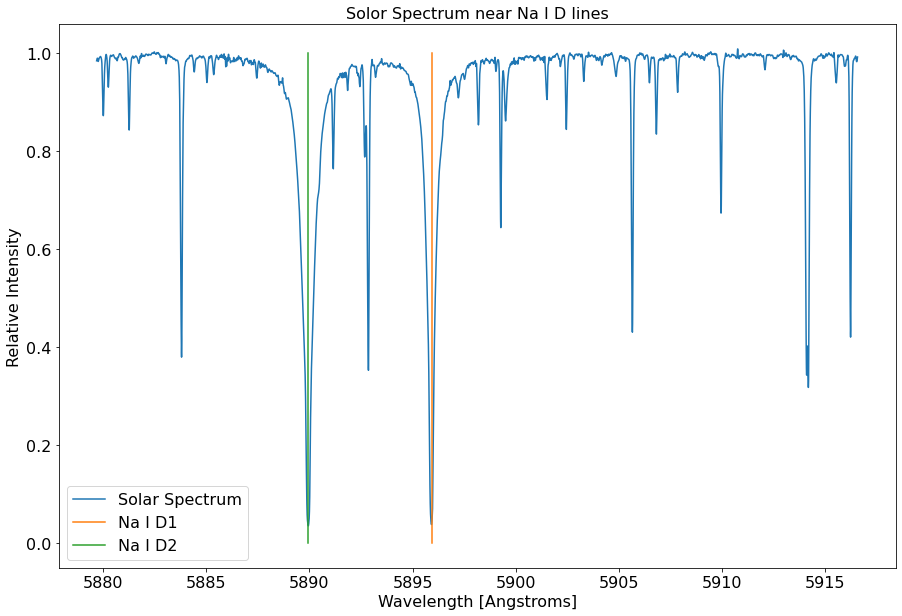

In [4]:
file = "nai_d_data.txt"
data = np.loadtxt(file)

# Convert vaccum wavelength to atmosphere wavelength
wavelength = data[:, 0] * 0.99972683 + 0.0107 - (196.25/ data[:, 0])
intensity = data[:, 1]

# Make data to plot location of the Na D 1 lines
na1d1 = np.repeat(5895.942, 2)
na1d2 = np.repeat(5889.950, 2)
y = [0, 1]

fig, ax = plt.subplots(1,1, figsize = (15, 10))
plt.tick_params(labelsize = 16)

# Plot Solar Spectrum
ax.plot(wavelength, intensity, label = "Solar Spectrum")

#Plot Na D 1 lines
ax.plot(na1d1, y, label = "Na I D1")
ax.plot(na1d2, y, label = "Na I D2")

ax.legend(fontsize = 16)
ax.set_xlabel('Wavelength [Angstroms]', fontsize = 16)
ax.set_ylabel('Relative Intensity', fontsize = 16)
ax.set_title('Solor Spectrum near Na I D lines', fontsize = 16)

#### Question 4: 

[]


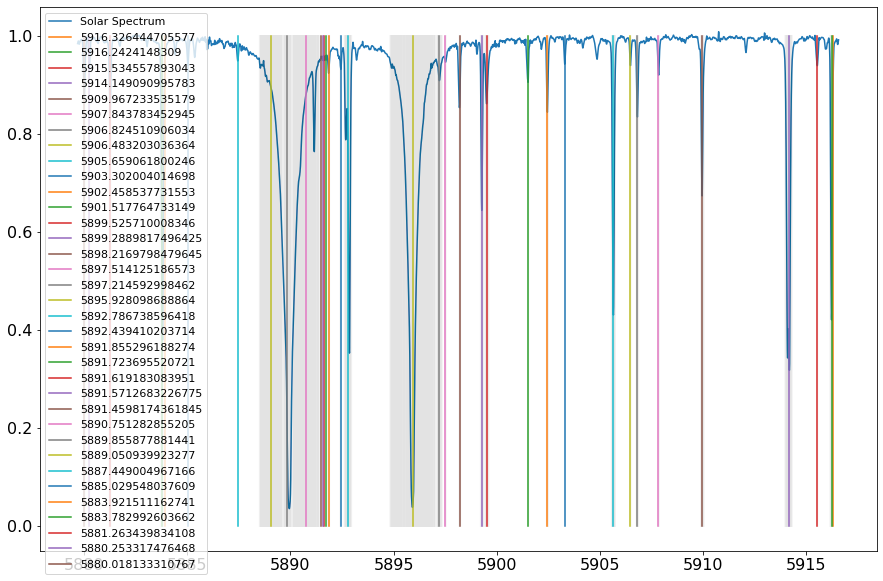

In [5]:
# Identify the wavelengths with intensity below some threshold
idx_true = data[:, 1] < 0.95

fig, ax = plt.subplots(1,1, figsize = (15, 10))
plt.tick_params(labelsize = 16)
ax.plot(wavelength, intensity, label = "Solar Spectrum")

#Plot all of those wavelengths
for i in wavelength[idx_true]:
    ax.plot(np.repeat(i, 2), [0, 1], alpha = 0.01, color = 'k')
    
ends = [0]
centers = []
print(centers)
for i in range(len(wavelength[idx_true])):
    if abs(wavelength[idx_true][i] - wavelength[idx_true][i - 1]) > 0.01:
    # Does math here that gives the index of the middle of the wavelength range
        idx = ends[-1] + (i - ends[-1])/2
        ends.append(i)
        centers.append(int(idx))
    # Get the middle of the very last line
    elif i == len(wavelength[idx_true]) - 1: 
        idx = ends[-1] + (i - ends[-1])/2
        ends.append(i)
        centers.append(int(idx))

y = [0, 1]
for wl in wavelength[idx_true][centers]:
    line = np.repeat(wl, 2)
    ax.plot(line, y, label = str(wl))
ax.legend(fontsize = 11)

The above program attempts to find the line centers of the prominent lines from the solar spectrum. The number of lines it identifies depends on the intenstity that is used to filter the spectrum. Higher intensity threshold means that more lines are identified. Checking the wavelengths listed in the legend against the [ASD catalog](https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra=&limits_type=0&low_w=5880&upp_w=5920&unit=0&submit=Retrieve+Data&de=0&format=0&line_out=0&en_unit=0&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=0&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on) enables the identification of some of the lines: Fe I is responsible for lines at the following wavelengths: 5880.01, 5881.27, 5883.81, 5891.17, 5892.69, 5905.67, 5906.84, 5909.97, 5914.11, 5914.20. Ti has a strong line at 5899.29, and Thorium has a line just adjacent at 5899.51, and another at 5892.78 adjacent to teh Fe I line at nearly the same location. The exact location of the line centers could be better determined if the line center was reselected when using a smaller subset of the data. 

*How many elements are we likely to be able to identify in this spectrum from looking at the most prominent lines?*

*You ought to combine the two above plots and make all the Fe line the same color and make all the Ti lines the same color and any other lines that appear there.*

*can you write a program that search the ASD catalog automagically to find the best candidate spectral lines?*

0.037939 0.035164


Text(0.5, 1.0, 'Na I D2 line')

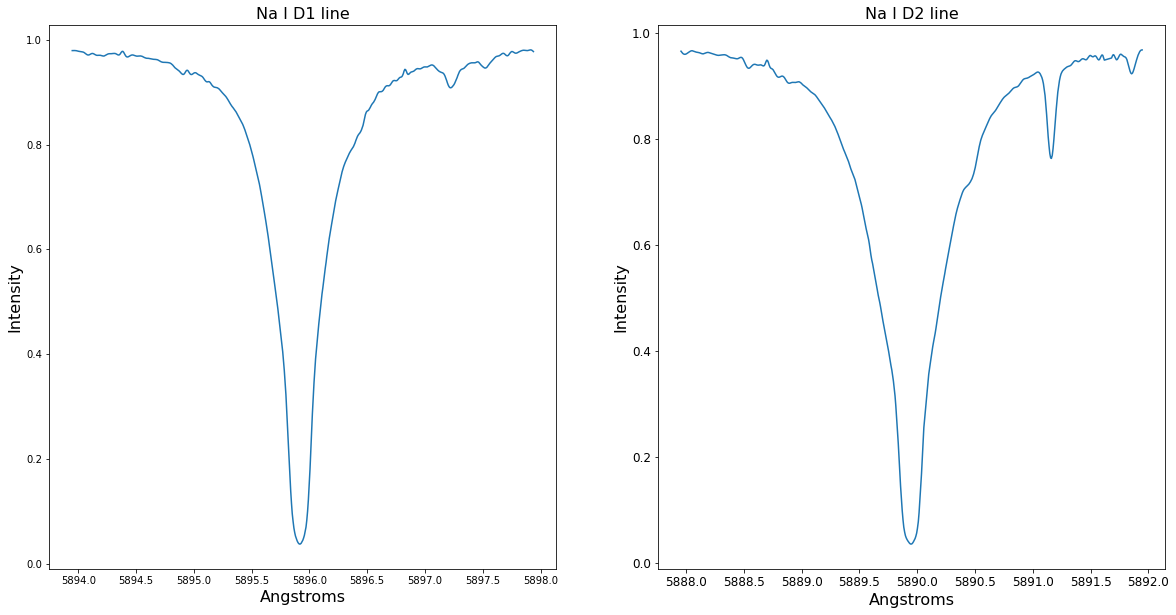

In [6]:
# Plot a subset of the spectrum around the Na I D lines
subset = [abs(wavelength - na1d1[0]) < 2, abs(wavelength - na1d2[0]) < 2]

fig, ax = plt.subplots(1, 2, figsize = (20, 10))
plt.tick_params(labelsize = 12)

ax[0].plot(wavelength[subset[0]], intensity[subset[0]])
print(min(intensity[subset[0]]), min(intensity[subset[1]]))
ax[0].set_title('Na I D1 line', fontsize = 16)
ax[0].set_xlabel('Angstroms', fontsize = 16)
ax[0].set_ylabel('Intensity', fontsize = 16)
ax[1].plot(wavelength[subset[1]], intensity[subset[1]])
ax[1].set_xlabel('Angstroms', fontsize = 16)
ax[1].set_ylabel('Intensity', fontsize = 16)
ax[1].set_title('Na I D2 line', fontsize = 16)
    

The D2 line looks somewhat broader than the D1 line. Both lines look like they are asymmetric with a longer "wing" on the higher wavelength side. There is a more pronounced bulge on the D2 line on the longer wavelength side, this may be the result of another spectral line overlapping with the D2 line. Both lines have very nearly the same depth. 

### Part 3

In [7]:
import line_functions as lf
import scipy.optimize

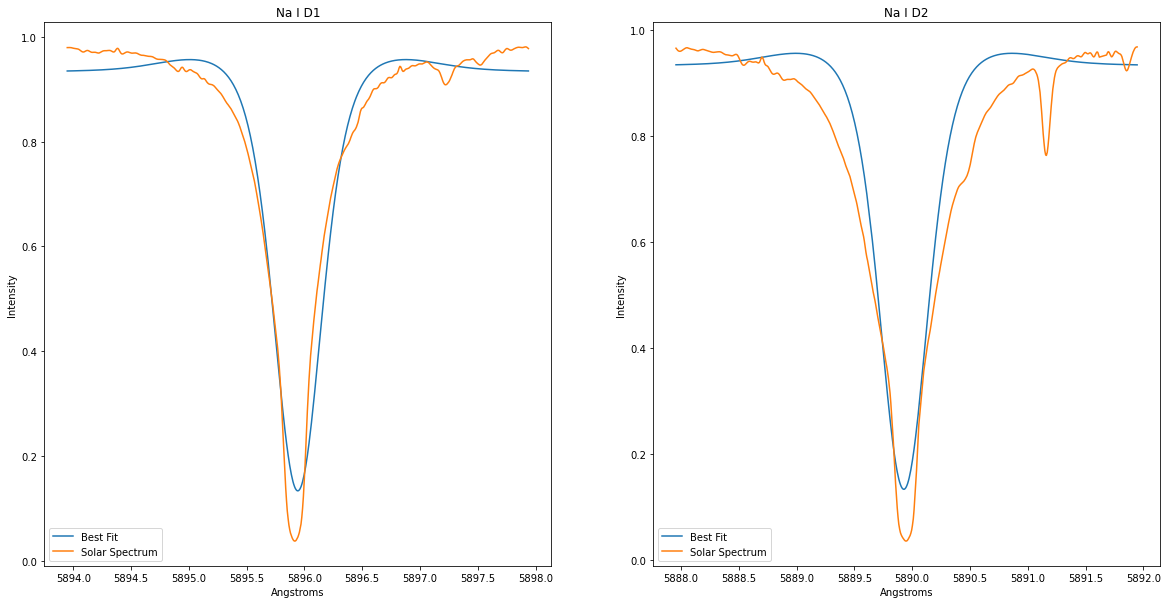

In [17]:
# Define the wavelengths to fit over: 


# The optical depth is given by the voigt profile,
# And both intial intensity and that ion the medium are given
# By the planck function

def norm_intensity(lam, alpha, gamma, T1):
    """
    Function to wrap the voigt profile and the blackbody profile
    up and return the normalized intenstity from the one layer model
    
    Parameters
    ----------
    lam: float
        wavelength (in cm) of light
    alpha & gamma: floats
        paramters of the voigt profile
    T1: float
        Temperature in Kelvin of the source blackbody
        
    Returns:
    --------
    float: 
        Normalized intensity
    """
    tsurface = 5770 # Surface temperature which remains constant
    tau = V(lam - np.mean(lam), alpha, gamma)
    io = lf.planck(lam * 1e-8, T1) # Convert Angstroms to centimeters
    bLam = lf.planck(lam * 1e-8, tsurface)
    return lf.one_layer_I(io, tau, bLam) / bLam

# Now use curve fit to give values for all the parameters: 
params = scipy.optimize.curve_fit(norm_intensity, # The function whose parameters it fits
                                  wavelength[subset[0]], # The wavelengths we want to fit over
                                  intensity[subset[0]], # The intensities we want a best fit for
                                 bounds = ([-1.1, -1.1, 4000.], 
                                           [1, 1, 6000.])) # Don't use symmetric bounds

# Plot the best fit for the Na I D1 line
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
lines = ('Na I D1', 'Na I D2')

for a in range(2):
    ax[a].plot(wavelength[subset[a]], 
             norm_intensity(wavelength[subset[a]], params[0][0], params[0][1], params[0][2]),
              label = "Best Fit")
    ax[a].plot(wavelength[subset[a]], intensity[subset[a]], label = "Solar Spectrum")
    ax[a].legend()
    ax[a].set_title(lines[a], fontsize = 12)
    ax[a].set_xlabel('Angstroms', fontsize = 10)
    ax[a].set_ylabel('Intensity', fontsize = 10)

#### Question 6

The fit roughly matches the overall shape of the two lines, however, the fit doesn't match the depth *or* the wings qualitatively. The model has the wings curving slightly downwards as the wavelengths diverge from the wavelength of the line center. Also for both lines the fit is narrower at the top than the lines from the solar spectrum. The cores for both fits are somewhat offset from the core of the solar spectrums. This could be resolved if the line core was one of the paramters passed to the optimization function but this would require another set of parameters be generated for each fit. The problem statement says explicitely 


* Is it possible to fit both of them at once? this would enable using the same parameters to fit both curves
* Changing from using cm or angstroms didn't change teh best fit curve at all so what is going on there? 
* Is there